# Plots justification of the clustering algorithm

In this code some aditional plots are generated using the best combination of parameters that we have obtained using the different clustering algorithm.

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

## Preprocessing

In [5]:
data = pd.read_csv("../../data/genedata.csv")

# Class is substracted in order to have coincident results.
data['class'] = data['class'].apply(lambda x: x-1)
data_classes = list(data['class'])

data

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,1,4,4.8778,4.4118,9.0690,10.0966,11.1664,10.2457,8.2541,12.0844,...,11.4206,9.5440,8.5381,11.4735,10.1581,7.8083,8.7157,9.4212,9.9236,8.5223
1,2,3,8.9505,2.7079,10.0899,6.5899,9.5933,8.3250,9.9028,12.4863,...,13.0857,9.4303,11.0118,9.8609,8.9299,10.4229,10.5660,7.9997,9.9458,10.5250
2,3,4,4.7239,3.7181,9.2404,10.1070,10.0589,9.5977,8.3794,12.8728,...,8.2631,9.7016,7.7138,14.3444,9.2942,8.5537,8.7280,7.9019,11.4660,8.9878
3,4,4,7.6797,4.1321,9.3522,9.3646,10.2057,9.4130,8.8524,13.2288,...,10.7985,9.1055,8.4670,11.4066,10.0314,8.3365,9.1870,7.7253,10.1910,9.7299
4,5,0,6.1541,5.9960,9.5418,8.9614,9.6077,9.3430,9.9071,13.1981,...,12.2830,8.7680,9.1708,9.9139,9.4670,9.8127,9.2294,7.7958,9.2692,10.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,5.5051,5.5937,8.8036,9.8995,10.2081,7.0993,10.0181,13.7360,...,12.3530,9.2083,8.2600,10.0181,9.1594,9.1573,8.9010,7.5171,8.9912,10.5179
791,792,3,6.4445,6.3149,9.9281,5.7244,10.0598,8.3327,8.9625,12.7977,...,11.4967,9.3160,11.3185,9.7353,9.0437,9.8171,7.9135,8.8159,10.6293,10.6889
792,793,2,9.3204,8.1726,9.1752,9.9419,10.7564,9.7459,9.9507,12.5833,...,11.1193,9.0767,9.2110,10.0821,9.6255,10.9260,7.9507,7.5112,8.6089,10.1170
793,794,4,6.7255,5.5300,9.6569,9.7835,10.8310,9.3115,8.4064,12.3590,...,10.1283,9.3001,8.4043,10.9690,8.9199,9.2516,8.1096,8.3683,11.4727,9.8517


In [6]:
# Columns id and class are dropped from the dataframe.
preprocessed_data = data.drop(columns=['id', 'class'])

preprocessed_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f6991,f6992,f6993,f6994,f6995,f6996,f6997,f6998,f6999,f7000
0,4.8778,4.4118,9.0690,10.0966,11.1664,10.2457,8.2541,12.0844,6.8658,5.7480,...,11.4206,9.5440,8.5381,11.4735,10.1581,7.8083,8.7157,9.4212,9.9236,8.5223
1,8.9505,2.7079,10.0899,6.5899,9.5933,8.3250,9.9028,12.4863,7.5498,9.5101,...,13.0857,9.4303,11.0118,9.8609,8.9299,10.4229,10.5660,7.9997,9.9458,10.5250
2,4.7239,3.7181,9.2404,10.1070,10.0589,9.5977,8.3794,12.8728,8.8574,5.8791,...,8.2631,9.7016,7.7138,14.3444,9.2942,8.5537,8.7280,7.9019,11.4660,8.9878
3,7.6797,4.1321,9.3522,9.3646,10.2057,9.4130,8.8524,13.2288,9.2525,5.7487,...,10.7985,9.1055,8.4670,11.4066,10.0314,8.3365,9.1870,7.7253,10.1910,9.7299
4,6.1541,5.9960,9.5418,8.9614,9.6077,9.3430,9.9071,13.1981,8.8106,5.5387,...,12.2830,8.7680,9.1708,9.9139,9.4670,9.8127,9.2294,7.7958,9.2692,10.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,5.5051,5.5937,8.8036,9.8995,10.2081,7.0993,10.0181,13.7360,8.9059,6.4352,...,12.3530,9.2083,8.2600,10.0181,9.1594,9.1573,8.9010,7.5171,8.9912,10.5179
791,6.4445,6.3149,9.9281,5.7244,10.0598,8.3327,8.9625,12.7977,8.8633,7.3106,...,11.4967,9.3160,11.3185,9.7353,9.0437,9.8171,7.9135,8.8159,10.6293,10.6889
792,9.3204,8.1726,9.1752,9.9419,10.7564,9.7459,9.9507,12.5833,8.9300,7.8694,...,11.1193,9.0767,9.2110,10.0821,9.6255,10.9260,7.9507,7.5112,8.6089,10.1170
793,6.7255,5.5300,9.6569,9.7835,10.8310,9.3115,8.4064,12.3590,8.3744,6.3127,...,10.1283,9.3001,8.4043,10.9690,8.9199,9.2516,8.1096,8.3683,11.4727,9.8517


## Execution

In [20]:
silhouette_scores = []
db_scores = []
ch_scores = []

In [3]:
range_n_clusters = [2, 3, 4,5, 6, 7, 8]

# Best parameter combination.
affinity = "nearest_neighbors"
k = 5
gamma = 1.5

In [21]:
for n_clusters in range_n_clusters:
    sc = SpectralClustering(n_clusters=n_clusters, affinity=affinity, gamma=gamma)
    fit_cluster = sc.fit(preprocessed_data)
    labels = fit_cluster.labels_
    
    # Silhouette analysis
    silhouette_scores.append(silhouette_score(preprocessed_data, labels))
    
    # Calinski-Harabasz analysis
    ch_scores.append(calinski_harabasz_score(preprocessed_data, labels))
    
    # Davies-Bouldin analysis
    db_scores.append(davies_bouldin_score(preprocessed_data, labels))

## Plots generation

In [37]:
def plot_graph(metric_values, title, y_label, file_path):
    plt.plot(range_n_clusters, metric_values)
    plt.title(title)
    plt.xlabel('Number of clusters')
    plt.ylabel(y_label)
    plt.savefig(f"plots/{file_path}")
    plt.show()

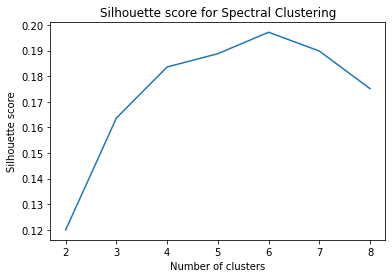

In [38]:
plot_graph(silhouette_scores, "Silhouette score for Spectral Clustering", "Silhouette score", "best-ss.png")

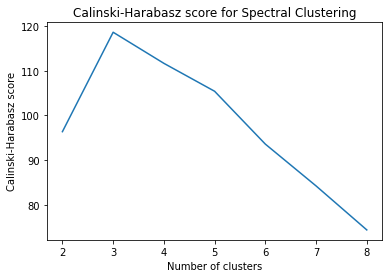

In [39]:
plot_graph(ch_scores, "Calinski-Harabasz score for Spectral Clustering", "Calinski-Harabasz score", "best-ch.png")

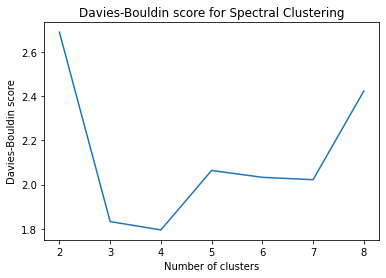

In [40]:
plot_graph(db_scores, "Davies-Bouldin score for Spectral Clustering", "Davies-Bouldin score", "best-db.png")